# Caida de P$P (Guatemala)

## Conexión con AWS300

In [74]:
import pandas as pd
import pyodbc
import warnings
warnings.filterwarnings('ignore')

conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=AWNTS300;DATABASE=DATALAB;UID=usrdm;PWD=dm$2Admin4')

In [75]:
 df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)

In [76]:
df.head()

,Pkebelista,v201711,v201712,v201713,v201715,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
0,245726,26628.379925,28062.429781,20703.969954,55986.529604,9,NaN,NaN,4,20703.969954,...,79.325555,15,17,9,0,0,0,0,5,1973-12-03
1,247412,36262.499485,37686.600151,15762.899895,44087.399969,12,NaN,NaN,6,15762.899895,...,52.543000,17,18,10,0,0,0,0,6,1997-08-04
2,258294,12952.319824,18401.280151,15154.239990,23932.479980,12,7.0,17854.506470,7,15154.239990,...,67.652857,6,9,7,0,0,0,0,7,1964-06-14
3,258551,12660.479858,12619.199707,15199.359924,15979.199829,16,4.0,22915.108538,7,15199.359924,...,94.996000,5,2,5,0,0,0,0,6,1990-10-06
4,260409,24095.040161,18920.319946,19564.800110,13748.799805,18,5.0,21650.453089,4,19564.800110,...,76.425000,12,12,8,1,0,0,0,5,1990-02-11


In [77]:
print('La base de datos cuenta con ' + str(df.shape[0]) + ' filas y ' 
      + str(df.shape[1]) +' columnas.')

La base de datos cuenta con 15605 filas y 25 columnas.


In [78]:
def PromVariacion (num1, num2, num3):
    var1 = ((num2/num1)-1)
    var2 = ((num3/num2)-1)
    PromVar = (var1+var2)/2
    return PromVar*100


In [79]:
df['VarVentas3Camp'] = PromVariacion(df.v201711,df.v201712,df.v201713)
df['VarMCT3Camp'] =PromVariacion(df.mct201711,df.mct201712,df.mct201713)
df['VarPPU3Camp'] =PromVariacion(df.ppu201711,df.ppu201712,df.ppu201713)
df['VarPPU3Camp'] =PromVariacion(df.Q201711,df.Q201712,df.Q201713)
df['Target'] = (df.v201715/df.v201713 -1)*100


In [80]:
df1 = df.drop(['v201711', 'v201712','v201713','v201715','mct201711','mct201712','mct201713','ppu201711','ppu201712','ppu201713',
               'Q201711', 'Q201712', 'Q201713'], axis=1)


In [81]:
pd.DataFrame(df1.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
pd201711,int64
pd201712,int64
pd201713,int64


In [82]:
import numpy as np

df1['TargetBinary'] = np.where(df1['Target']<-10, 1, 0)

df1['TargetBinary'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    8749
1    6856
Name: TargetBinary, dtype: int64

In [83]:
import datetime as DT
import io

now = pd.Timestamp(DT.datetime.now())
df1['FechaNacimiento'] = df1['FechaNacimiento'].where(df1['FechaNacimiento'] < now, df1['FechaNacimiento'] -  np.timedelta64(100, 'Y'))   # 2
df1['Edad'] = (now - df1['FechaNacimiento']).astype('<m8[Y]')    # 3

df2 = df1.drop(['FechaNacimiento'], axis=1)

In [97]:
df2.head()



,Pkebelista,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,TargetBinary,Edad
0,245726,9,NaN,NaN,4,20703.969954,0,0,0,0,5,-10.418165,-31.250000,-16.862745,0,44.0
1,247412,12,NaN,NaN,6,15762.899895,0,0,0,0,6,-27.123264,-22.424242,-19.281046,0,20.0
2,258294,12,7.0,17854.506470,7,15154.239990,0,0,0,0,7,12.211824,4.166667,13.888889,0,53.0
3,258551,16,4.0,22915.108538,7,15199.359924,0,0,0,0,6,10.060126,20.833333,45.000000,0,27.0
4,260409,18,5.0,21650.453089,4,19564.800110,1,0,0,0,5,-9.035001,-3.333333,-16.666667,1,28.0


In [89]:
df2['Edad'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

26.0     468
33.0     468
35.0     449
30.0     444
32.0     439
34.0     437
28.0     437
29.0     437
36.0     435
31.0     430
27.0     424
40.0     420
39.0     416
41.0     414
38.0     413
37.0     408
25.0     407
43.0     382
23.0     380
24.0     373
42.0     373
22.0     372
44.0     363
46.0     353
45.0     345
21.0     339
48.0     334
47.0     324
53.0     291
49.0     282
        ... 
19.0      91
66.0      90
69.0      57
70.0      48
71.0      19
72.0      16
73.0      16
74.0      16
76.0      14
75.0      12
77.0       9
78.0       7
82.0       5
83.0       4
79.0       4
80.0       3
98.0       3
84.0       2
93.0       1
10.0       1
85.0       1
95.0       1
90.0       1
88.0       1
100.0      1
97.0       1
91.0       1
81.0       1
99.0       1
86.0       1
Name: Edad, Length: 78, dtype: int64

In [91]:
count_edad = df2.groupby([u'Edad'])[u'Edad'].count().reset_index(name='count')

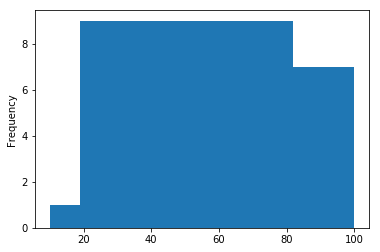

In [90]:
%matplotlib inline

count_edad[u'Edad'].plot(kind='hist')

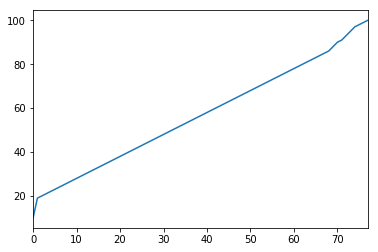

In [92]:
count_edad[u'Edad'].plot()

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

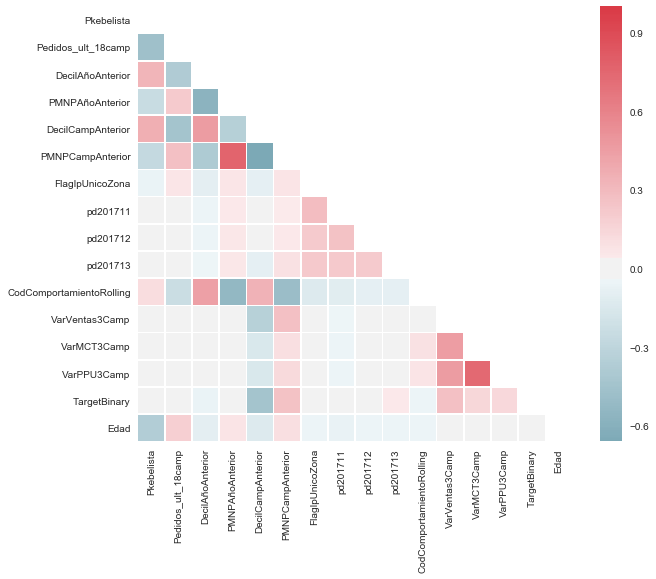

In [98]:
corr_1(df2)

## Modelo

In [131]:
df3 = df2.drop(['DecilAñoAnterior', 'PMNPAñoAnterior' ], axis=1)
# PREPROCESAR http://scikit-learn.org/stable/modules/preprocessing.html

ValueError: labels ['DecilAñoAnterior' 'PMNPAñoAnterior'] not contained in axis

In [118]:
df3.shape
df[df.isnull().any(axis=1)]

(15605, 14)

In [119]:
df3[df3.isnull().any(axis=1)]

,Pkebelista,Pedidos_ult_18camp,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,TargetBinary,Edad
9304,286912,14,9,10474.879929,1,0,0,0,7,-21.959505,11.666667,-5.551115e-15,0,NaN
12947,188274,18,5,17603.839600,1,0,0,0,6,-12.885473,-8.333333,-1.458333e+01,1,NaN


In [124]:
df3 = df3.drop(df.index[[9304,12947]])

In [125]:
#Hacemos split de la data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df3.loc[:, df3.columns != 'TargetBinary'],
 df3[u'TargetBinary'].values, 
 test_size=0.15, 
 random_state=42)

In [132]:
from sklearn import tree
q_niveles_arbol = 15
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = q_niveles_arbol)
clf = clf.fit(X_train, y_train)

In [133]:
y_pred = clf.predict(X_test)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.74      0.72      1297
          1       0.66      0.63      0.64      1044

avg / total       0.69      0.69      0.69      2341



Ajustes al modelo:
- No eliminar las columnas con data del año pasado sino procesarlas (reemplazar con decil 0?, reemplazar con la media?)
- trabajr solo con las filas de las cuales se tiene info del año pasado?



In [139]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

In [143]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()


In [146]:
labels = ['Sí Cae', 'Sube o Mantiene']
print_cm(cnf_matrix, labels)

                             Sí Cae Sube o Mantiene 
             Sí Cae           957.0           340.0 
    Sube o Mantiene           387.0           657.0 


In [156]:

y_pred2 = np.ones(len(y_pred))


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1297
          1       0.45      1.00      0.62      1044

avg / total       0.20      0.45      0.28      2341

